<a href="https://colab.research.google.com/github/JonathanFLima/APS-AV2-Otimizacao-Sistemas-151R/blob/main/aps_av2_151r_otimiza_o_de_sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Aluno: Jonathan Florencio de Lima
#Matéria: Otimização de Sistemas      Turma: 151R
#Professor: Sérgio Monteiro

In [ ]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 16.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install requests --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
import requests
url = "https://investnews.com.br/financas/veja-a-lista-completa-dos-bdrs-disponiveis-para-pessoas-fisicas-na-b3/"
r = requests.get(url)
html = r.text
df_nomes_tickers = pd.read_html(html, header=0)[0]
df_nomes_tickers.head(10)

,EMPRESA,CÓDIGO,SETOR,PAÍS DE ORIGEM
0,3M,MMMC34,Indústria diversificada,EUA
1,AB INBEV,ABUD34,Bebidas,Bélgica
2,ABB LTD,A1BB34,Industrial,Switzerland
3,ABBOTT,ABTT34,Farmacêuticos,EUA
4,ABBVIE,ABBV34,Medicamentos e Outros Produtos,EUA
5,ABIOMED INC,A1BM34,Saúde,EUA
6,ACTIVISION,ATVI34,Tecnologia,EUA
7,ADOBE INC,ADBE34,Tecnologia,EUA
8,ADVANCE AUTO PARTS INC,A1AP34,Peças Automotivas,EUA
9,ADVANCED MIC,A1MD34,Tecnologia,EUA


In [ ]:
with pd.option_context('display.max_rows',10):
  print(df_nomes_tickers)

           EMPRESA  CÓDIGO                                   SETOR  \
0               3M  MMMC34                 Indústria diversificada   
1         AB INBEV  ABUD34                                 Bebidas   
2          ABB LTD  A1BB34                              Industrial   
3           ABBOTT  ABTT34                           Farmacêuticos   
4           ABBVIE  ABBV34          Medicamentos e Outros Produtos   
..             ...     ...                                     ...   
703  RAYTHEON TECH  RYTT34                              Industrial   
704   SCHLUMBERGER  SLBG34  Equipamentos e Serviços de Combustível   
705        TIFFANY  TIFF34                               Joalheria   
706     US BANCORP  USBC34                  Instituição Financeira   
707         XP INC  XPBR31                              Financeiro   

    PAÍS DE ORIGEM  
0              EUA  
1          Bélgica  
2      Switzerland  
3              EUA  
4              EUA  
..             ...  
703         

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import yfinance as yf
import warnings
import matplotlib
import statsmodels.api as sm

In [ ]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

In [ ]:
# importar pacotes necessários
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

**Carregando 10 ações (últimos 6 meses)**

In [ ]:
dados_series1 = yf.download("PETR4.SA", start="2022-06-01", end="2022-11-30") #Petrobrás
dados_series2 = yf.download("BTC-USD", start="2022-06-01", end="2022-11-30")  #Bitcoin
dados_series3 = yf.download("NFLX", start="2022-06-01", end="2022-11-30") #Netflix
dados_series4 = yf.download("TWTR", start="2022-06-01", end="2022-11-30") #Twitter
dados_series5 = yf.download("AMZN", start="2022-06-01", end="2022-11-30") #Amazon
dados_series6 = yf.download("AAPL", start="2022-06-01", end="2022-11-30") #Apple Inc
dados_series7 = yf.download("META", start="2022-06-01", end="2022-11-30") #Meta Plataform
dados_series8 = yf.download("PINS", start="2022-06-01", end="2022-11-30") #Pinterest
dados_series9 = yf.download("ROKU", start="2022-06-01", end="2022-11-30") #Roku Inc
dados_series10 = yf.download("DOCU", start="2022-06-01", end="2022-11-30") #DocuSign

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**Exemplo de dados da primeira ação (Petrobrás)**

In [ ]:
with pd.option_context('display.max_rows',10):
  print(dados_series1)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2022-06-01  29.900000  30.330000  29.850000  30.020000  24.444973   46353200
2022-06-02  29.969999  30.049999  29.549999  29.760000  24.233257   50738300
2022-06-03  29.709999  30.440001  29.530001  30.280001  24.656689   60396900
2022-06-06  30.500000  30.530001  29.910000  30.299999  24.672974   39213900
2022-06-07  30.190001  31.299999  30.160000  30.660000  24.966118   80333700
...               ...        ...        ...        ...        ...        ...
2022-10-25  34.040001  34.500000  33.209999  33.529999  33.529999  113161200
2022-10-26  32.599998  33.529999  31.900000  32.709999  32.709999  121334800
2022-10-27  32.810001  33.540001  32.669998  32.959999  32.959999  111008800
2022-10-28  32.700001  33.119999  31.860001  32.570000  32.570000  129745400
2022-10-31  30.610001  31.600000  29.160000  29.809999  29.809999  262409400

**GRÁFICOS DAS AÇÕES**

**PETROBRÁS**

[Text(0.5, 1.0, 'PETROBRÁS - PETR4.SA')]

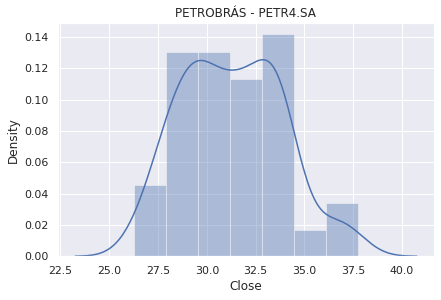

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series1['Close'].dropna()).set(title='PETROBRÁS - PETR4.SA')

**BITCOIN**

[Text(0.5, 1.0, 'BITCOIN - BTC-USD')]

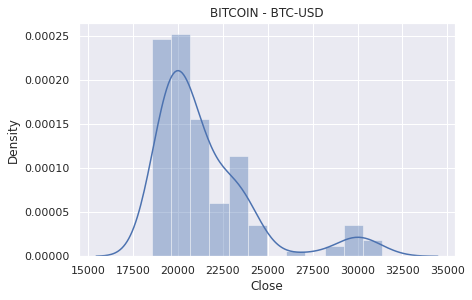

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series2['Close'].dropna()).set(title='BITCOIN - BTC-USD')

**NETFLIX**

[Text(0.5, 1.0, 'NETFLIX - NFLX')]

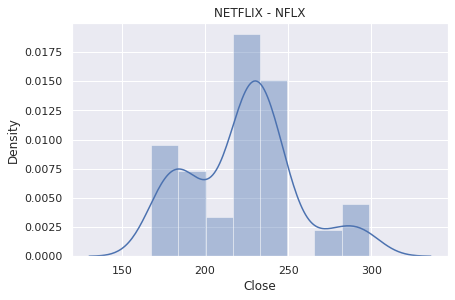

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series3['Close'].dropna()).set(title='NETFLIX - NFLX')

**TWITTER**

[Text(0.5, 1.0, 'TWITTER - TWTR')]

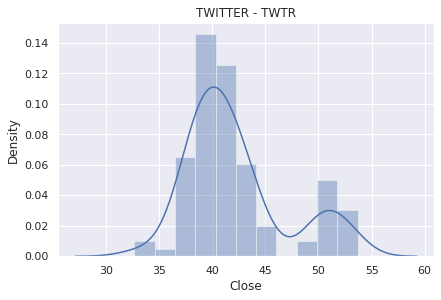

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series4['Close'].dropna()).set(title='TWITTER - TWTR')

**AMAZON**

[Text(0.5, 1.0, 'AMAZON - AMZN')]

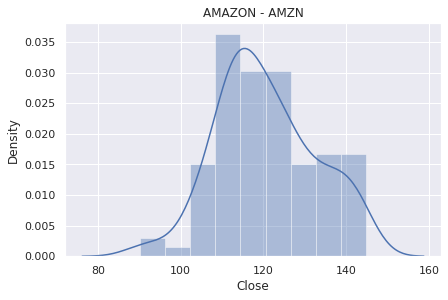

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series5['Close'].dropna()).set(title='AMAZON - AMZN')

**APPLE**

[Text(0.5, 1.0, 'APPLE INC - AAPL')]

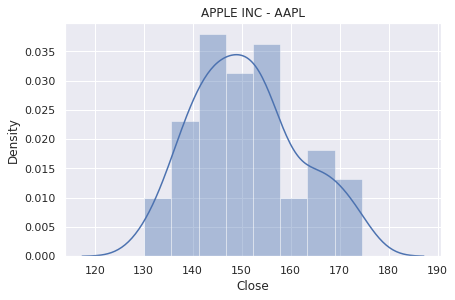

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series6['Close'].dropna()).set(title='APPLE INC - AAPL')

**META**

[Text(0.5, 1.0, 'META PLATAFORM - META')]

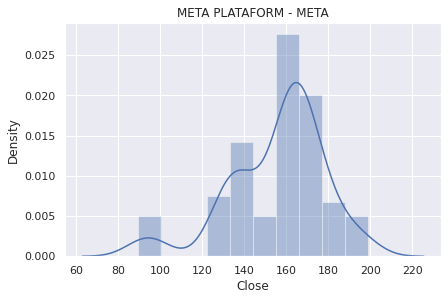

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series7['Close'].dropna()).set(title='META PLATAFORM - META')

**PINTEREST**

[Text(0.5, 1.0, 'PINTEREST - PINS')]

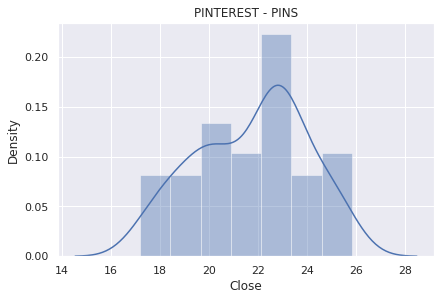

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series8['Close'].dropna()).set(title='PINTEREST - PINS')

**ROKU**

[Text(0.5, 1.0, 'ROKU - ROKU')]

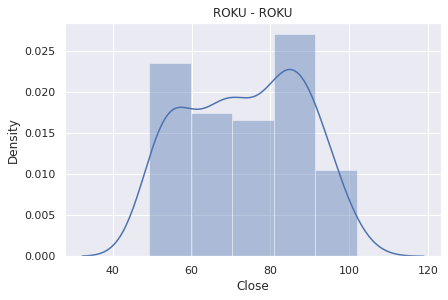

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series9['Close'].dropna()).set(title='ROKU - ROKU')

**DOCUSIGN**

[Text(0.5, 1.0, 'DOCUSIGN - DOCU')]

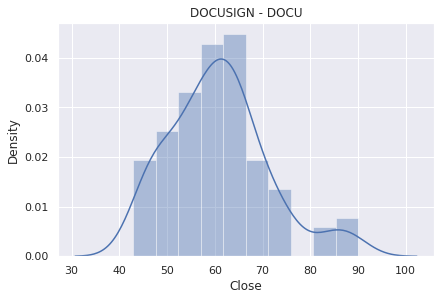

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series10['Close'].dropna()).set(title='DOCUSIGN - DOCU')

Baseado nos gráficos mostrados acima, podemos concluir que os 5 investimentos mais estáveis e promissores são das ações: **Petrobrás** (PETR4.SA), **Amazon** (AMZN), **Apple Inc** (AAPL), **Pinterest** (PINS) e **Roku** (ROKU).

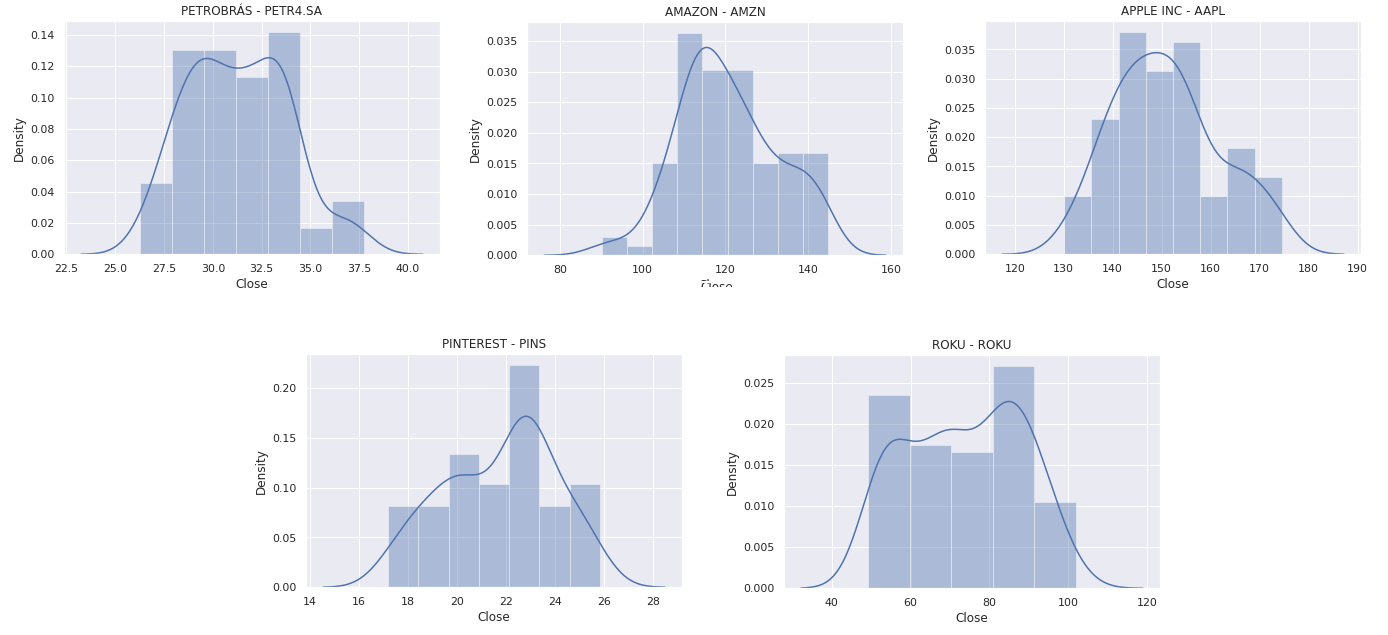